<a href="https://colab.research.google.com/github/alibekk93/IDP_analysis/blob/main/OMA_search/OMA_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# copy repo to get available datafiles

!git clone https://github.com/alibekk93/IDP_analysis.git

Cloning into 'IDP_analysis'...
remote: Enumerating objects: 620, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 620 (delta 80), reused 130 (delta 46), pack-reused 412
Receiving objects: 100% (620/620), 228.13 MiB | 30.40 MiB/s, done.
Resolving deltas: 100% (216/216), done.
Checking out files: 100% (50/50), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
oma = pd.read_csv('/content/IDP_analysis/OMA_search/OMA_allSpecies.csv')
tempura = pd.read_excel('/content/IDP_analysis/OMA_search/200617_TEMPURA.xlsx')

In [4]:
oma.head(3)

,Code,Scientific Name,Common Name,Last Update,# of Sequences,NCBI TaxonId,D.
0,TREPP,Tremblaya princeps (strain PCIT),NaN,2013-Dec-17,120,891398,B
1,HODCD,Hodgkinia cicadicola (strain Dsem),NaN,2013-May-28,169,573234,B
2,CARRP,Carsonella ruddii (strain PV),NaN,2007-May-03,182,387662,B


In [5]:
tempura.head(3)

,genus_and_species,taxonomy_id,strain,superkingdom,phylum,class,order,family,genus,assembly_or_accession,...,Genome_size,16S_accssion,16S_GC,Tmin,Topt_ave,Topt_low,Topt_high,Tmax,Tmax_Tmin,Expression
0,Methanopyrus kandleri,2320,116,Archaea,Euryarchaeota,Methanopyri,Methanopyrales,Methanopyraceae,Methanopyrus,NaN,...,NaN,AB301476,67.7,85.0,100.0,NaN,NaN,122.0,37.0,NaN
1,Geogemma barossii,1927912,121,Archaea,Crenarchaeota,Thermoprotei,Desulfurococcales,Pyrodictiaceae,Geogemma,NaN,...,NaN,NaN,NaN,85.0,106.0,NaN,NaN,121.0,36.0,NaN
2,Pyrolobus fumarii,54252,1A,Archaea,Crenarchaeota,Thermoprotei,Desulfurococcales,Pyrodictiaceae,Pyrolobus,GCA_000223395.1,...,1.8,X99555,68.4,90.0,106.0,NaN,NaN,113.0,23.0,NaN


In [6]:
oma['genus_and_species'] = [' '.join(sn.split(' ')[:2]) for sn in oma['Scientific Name']]

In [7]:
oma_tempura = pd.merge(left=oma, right=tempura, on='genus_and_species', how='inner')

In [8]:
oma_tempura[['Code', 'genus_and_species', 'Tmin', 'Topt_ave', 'Tmax']]

,Code,genus_and_species,Tmin,Topt_ave,Tmax
0,MYCMO,Mycoplasma mobile,17.0,30.0,30.0
1,UREU1,Ureaplasma urealyticum,20.0,32.5,40.0
2,METFV,Methanothermus fervidus,65.0,83.0,97.0
3,DEHMB,Dehalococcoides mccartyi,15.0,27.5,35.0
4,DEHMG,Dehalococcoides mccartyi,15.0,27.5,35.0
...,...,...,...,...,...
415,ACTM4,Actinoplanes missouriensis,15.0,28.0,32.0
416,ACAM1,Acaryochloris marina,20.0,29.0,35.0
417,STIAD,Stigmatella aurantiaca,18.0,30.0,37.0
418,CATAD,Catenulispora acidiphila,11.0,25.0,37.0


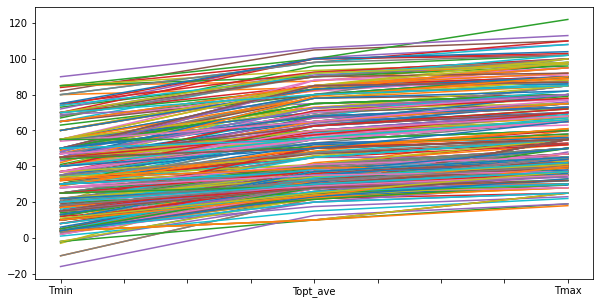

In [9]:
fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(oma_tempura)):
  oma_tempura.iloc[i][['Tmin', 'Topt_ave', 'Tmax']].plot(kind='line')

In [10]:
oma_tempura_bact = oma_tempura[oma_tempura.superkingdom=='Bacteria']

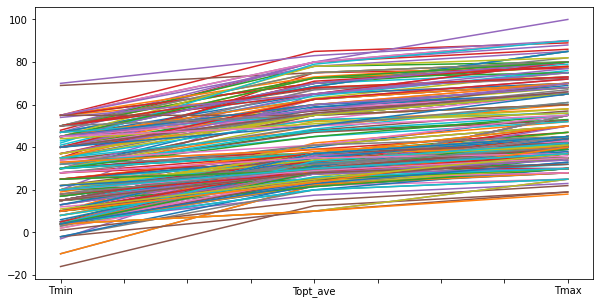

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

for i in range(len(oma_tempura_bact)):
  oma_tempura_bact.iloc[i][['Tmin', 'Topt_ave', 'Tmax']].plot(kind='line')

48


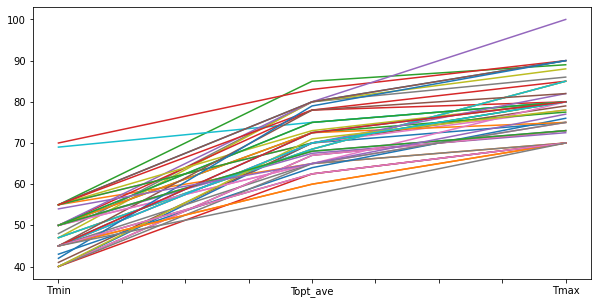

In [12]:
oma_tempura_bact_t = oma_tempura_bact[(oma_tempura_bact.Tmin >= 40) & (oma_tempura_bact.Tmax >= 70)]

fig, ax = plt.subplots(figsize=(10,5))

print(len(oma_tempura_bact_t))

for i in range(len(oma_tempura_bact_t)):
  oma_tempura_bact_t.iloc[i][['Tmin', 'Topt_ave', 'Tmax']].plot(kind='line')

8


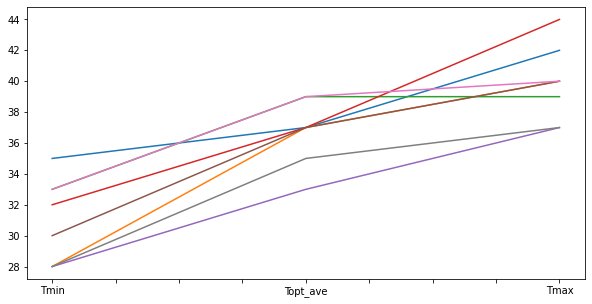

In [13]:
oma_tempura_bact_m = oma_tempura_bact[(oma_tempura_bact.Tmin > 25) & (oma_tempura_bact.Tmax < 45)]

fig, ax = plt.subplots(figsize=(10,5))

print(len(oma_tempura_bact_m))

for i in range(len(oma_tempura_bact_m)):
  oma_tempura_bact_m.iloc[i][['Tmin', 'Topt_ave', 'Tmax']].plot(kind='line')

15


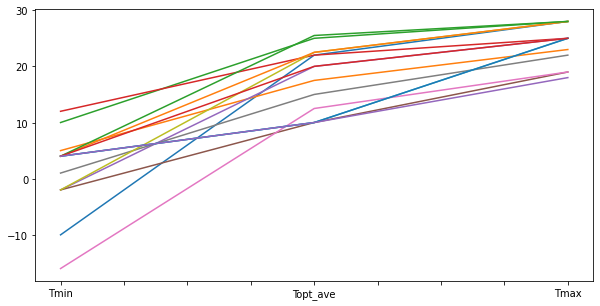

In [14]:
oma_tempura_bact_p = oma_tempura_bact[oma_tempura_bact.Tmax < 30]

fig, ax = plt.subplots(figsize=(10,5))

print(len(oma_tempura_bact_p))

for i in range(len(oma_tempura_bact_p)):
  oma_tempura_bact_p.iloc[i][['Tmin', 'Topt_ave', 'Tmax']].plot(kind='line')

In [15]:
oma_tempura_bact_t

,Code,Scientific Name,Common Name,Last Update,# of Sequences,NCBI TaxonId,D.,genus_and_species,taxonomy_id,strain,...,Genome_size,16S_accssion,16S_GC,Tmin,Topt_ave,Topt_low,Topt_high,Tmax,Tmax_Tmin,Expression
19,DESTD,Desulfurobacterium thermolithotrophum (strain...,NaN,2014-Jan-25,1495,868864,B,Desulfurobacterium thermolithotrophum,64160,BSAT,...,1.5,AJ001049,61.2,40.0,70.0,NaN,NaN,75.0,35.0,NaN
27,CALEA,Caldisericum exile (strain DSM 21853 / NBRC 1...,NaN,2014-May-21,1564,511051,B,Caldisericum exile,693075,AZM16c01,...,1.6,AB428365,55.2,55.0,65.0,NaN,NaN,70.0,15.0,NaN
31,THEAH,Thermocrinis albus (strain DSM 14484 / JCM 11...,NaN,2012-Jan-02,1592,638303,B,Thermocrinis albus,136094,HI 11/12,...,1.5,AJ278895,63.0,55.0,85.0,NaN,NaN,89.0,34.0,NaN
32,THEGP,Thermodesulfobacterium geofontis (strain OPF15),NaN,2014-Jun-18,1593,795359,B,Thermodesulfobacterium geofontis,1295609,OPF15,...,1.6,NR_118457,61.9,70.0,83.0,NaN,NaN,90.0,20.0,NaN
45,SULAA,Sulfurihydrogenibium azorense (strain Az-Fu1 ...,NaN,2009-Nov-01,1707,204536,B,Sulfurihydrogenibium azorense,309806,Az-Fu1,...,1.6,AF528192,57.4,50.0,68.0,NaN,NaN,73.0,23.0,NaN
52,FERNB,Fervidobacterium nodosum (strain ATCC 35602 /...,NaN,2008-Feb-26,1725,381764,B,Fervidobacterium nodosum,2424,Rt17â€B,...,1.9,M59177,58.7,41.0,70.0,NaN,NaN,79.0,38.0,NaN
58,THET7,Thermosulfidibacter takaii (strain DSM 17441 ...,NaN,2019-Aug-14,1757,1298851,B,Thermosulfidibacter takaii,412593,ABI70S6,...,1.8,AB282756,62.1,55.0,70.0,NaN,NaN,78.0,23.0,NaN
59,THENR,Thermotoga naphthophila (strain ATCC BAA-489 ...,NaN,2010-May-24,1765,590168,B,Thermotoga naphthophila,93930,RKU-10,...,1.8,AB027017,63.9,48.0,80.0,NaN,NaN,86.0,38.0,NaN
61,THEP1,Thermotoga petrophila (strain RKU-1 / ATCC BA...,NaN,2008-Feb-07,1783,390874,B,Thermotoga petrophila,93929,RKU-1,...,1.8,AB027016,64.4,47.0,80.0,NaN,NaN,88.0,41.0,NaN
64,THEA1,Thermovibrio ammonificans (strain DSM 15698 /...,NaN,2012-Nov-29,1812,648996,B,Thermovibrio ammonificans,228745,HB-1,...,1.8,AY263403,63.5,69.0,75.0,NaN,NaN,80.0,11.0,NaN


In [16]:
#@title # Do you already have the disorder scores?

#@markdown Many of the packages are only required if
#@markdown you have to calculate the disorder scores.
#@markdown If you already have the scores, you should
#@markdown tick the box below, it will save time.

scores_calculated = False #@param {type: 'boolean'}

if scores_calculated == False:
  # connecting with API
  import urllib.request
  import json

  # install chromium, its driver, and selenium, set options
  !apt update
  !apt install chromium-chromedriver
  !pip install selenium
  from selenium import webdriver
  from selenium.webdriver.common.keys import Keys
  from selenium.webdriver.common.by import By
  options = webdriver.ChromeOptions()
  options.add_argument('--headless')
  options.add_argument('--no-sandbox')
  options.add_argument('--disable-dev-shm-usage')

# Biopython
!pip install BIO
from Bio import SeqIO, AlignIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
from Bio.Align.Applications import ClustalwCommandline
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.SubsMat.MatrixInfo import blosum62
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.SeqUtils.ProtParamData import gravy_scales

# files uploading / downloading
from google.colab import files
import pickle
from io import StringIO

# statistics
!pip install --upgrade scipy
from scipy.stats import mannwhitneyu, chisquare, pearsonr, ttest_ind, ttest_rel, wilcoxon
from sklearn.preprocessing import MinMaxScaler

# other packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
from tqdm.contrib import tzip
tqdm.pandas()

# install ClustalW
!sudo apt-get update
!sudo apt-get install clustalw

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,533 

/usr/local/lib/python3.7/dist-packages/Bio/SubsMat/__init__.py:131: BiopythonDeprecationWarning: Bio.SubsMat has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.substitution_matrices as a replacement, and contact the Biopython developers if you still need the Bio.SubsMat module.
  BiopythonDeprecationWarning,


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu

In [17]:
def try_retrieve_url(url: str, filename: str):
  """A simple try / except pattern for urllib.request
  """

  try:
    return urllib.request.urlretrieve(url, filename)
  except:
    return np.nan

In [18]:
def calculate_iupred(proteinID_list: list, score_only: bool=True) -> list:
  """Calculate protein IDR profile using IUPred3 REST API

  Creates URL based on protein UniProt accession numbers
  (from a list). Each IDR profile is saved as a JSON file
  and put into a list. The JSON files are then unpacked,
  either all data or only IUPred3 score are saved.

  Parameters
  ----------
  proteinID_list : list
    a list of protein accessions for which to predict IDR
  score_only : bool (default=True)
    whether the return should only contain IUPRed3 score.
    Other data are AA sequence, and a binary disorder
    prediction.

  Returns
  -------
  list
    a list of either IUPred3 scores or of all data from
    each JSON as a dictionary.

  """

  # make a list of URLs
  iupredURL_list = ['http://iupred3.elte.hu/iupred3/' + proteinID + '.json' \
                    for proteinID in proteinID_list]

  # download JSON files
  print('Retrieving disorder values from server...')
  protein_files = [try_retrieve_url(iupredURL, proteinID  + '.json')\
                   for iupredURL, proteinID in zip(tqdm(iupredURL_list),\
                                                        proteinID_list)]
  
  # empty list for unpacked JSON data
  proteins = []
  
  # populate the empty list
  print('Unpacking json files...')
  for proteinID in tqdm(proteinID_list):
    try:
      with open('/content/{}.json'.format(proteinID), 'r') as f:
        d = json.load(f)
        # check if only scores need to be saved
        if score_only == True:
          d = d['iupred2']
    except:
      d = np.nan
    proteins.append(d)
  
  return proteins

In [19]:
def read_pickle_file(file_name: str):
  """A simple function to read pickle files

  Parameters
  ----------
  file_name : srt
    location of the pickle file
  
  Returns
  -------
  any format, but best with pd.DataFrames or lists
  
  """

  print(file_name + ' loading...')
  with open(file_name, 'rb') as f:
    result = pickle.load(f)
  print(file_name + ' loaded!')
  return result

In [20]:
def get_pondr_calculations(protein_ID: str, sequence: str, return_df: bool=True):
  """Uses Selenium to scrape PONDR disorder
  calculations for a given protein

  Parameters
  ----------
  protein_ID : str
    protein ID or name. Required by PONDR,
    but has no effect on result
  sequence : str
    AA sequence of the protein
  return_df : bool
    whether return should be a DataFrame
    (True) or a tuple of lists (False). True
    by default
  
  Returns:
  --------
  DataFrame or tuple with lists

  """

  # set up web driver to get data from pondr.com
  wd = webdriver.Chrome(options=options)
  wd.get('http://www.pondr.com/')
  # set options and submit
  wd.find_element(By.NAME, 'ProteinName').send_keys(protein_ID)
  wd.find_element(By.NAME, 'Sequence').send_keys(sequence)
  wd.find_element(By.NAME, 'VL3').click()
  wd.find_element(By.NAME, 'VSL2').click()
  wd.find_element(By.NAME, 'wcwraw').click()
  wd.find_element(By.NAME, 'submit_result').click()
  # paste the raw results table to a DataFrame
  try:
    table = wd.find_elements(By.TAG_NAME, 'pre')[-1]
    table_text = table.text
    disorder_df = pd.read_csv(StringIO(table_text.replace('  ', ' ')), sep=' ')[['VLXT', 'VL3', 'VSL2']]
  except:
    disorder_df = pd.DataFrame(columns=['VLXT', 'VL3', 'VSL2'])
  if return_df == True:
    return disorder_df
  else:
    return [*disorder_df['VLXT']], [*disorder_df['VL3']], [*disorder_df['VSL2']]

In [21]:
def fix_neg_inf(df: pd.DataFrame, replacement=np.nan) -> pd.DataFrame:
  """Replaces -inf values in a given dataframe

  Parameters
  ----------
  df : pd.DataFrame
    The dataframe with -inf to be replaced
  replacement
    The value to replace -inf with. Default
    is np.nan
  
  Returns:
  --------
  pd.DataFrame

  """

  df_new = df.copy()
  df_new[df.astype(float) < 0] = replacement
  return df_new